In [1]:
import numpy as np

from scipy.io import loadmat
from scipy import optimize

import pandas as pd

# %matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

from sklearn import svm

In [2]:
np.random.seed(0)

In [3]:
dataFile_1 = 'ex6data1.mat'
dataFile_2 = 'ex6data2.mat'
dataFile_3 = 'ex6data3.mat'

In [4]:
data_1 = loadmat(dataFile_1)
data_2 = loadmat(dataFile_2)
data_3 = loadmat(dataFile_3)
print(type(data_1))
print(type(data_2))
print(type(data_3))
print(data_1.keys())
print(data_2.keys())
print(data_3.keys())
print(data_1['X'].shape)
print(data_2['X'].shape)
print(data_3['X'].shape)
print(type(data_1['X']))
print(data_1['y'].shape)
print(data_2['y'].shape)
print(data_3['y'].shape)
print(np.unique(data_1['y']))
print(np.unique(data_2['y']))
print(np.unique(data_3['y']))

<class 'dict'>
<class 'dict'>
<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])
(51, 2)
(863, 2)
(211, 2)
<class 'numpy.ndarray'>
(51, 1)
(863, 1)
(211, 1)
[0 1]
[0 1]
[0 1]


# 1 Support Vector Machine (the crazy bit of machine learning)

## 1.1 Data Extraction and Transformation

In [5]:
def getData(dataFile, xLabel, yLabel):
    data = loadmat(dataFile)
    X = np.insert(data[xLabel], 0, 1, axis=1)
    sampleSize, nVariables = X.shape
    y = data[yLabel]
    return X.flatten(), y.flatten(), sampleSize, nVariables

def getBeta(nVariables):
    beta = np.zeros(nVariables)
    return beta

In [6]:
X, y, sampleSize, nVariables = getData(dataFile_1, 'X', 'y')
beta = getBeta(nVariables)
print(X.reshape(sampleSize, -1).shape)
print(y.reshape(sampleSize, -1).shape)
print(beta.reshape(nVariables, -1).shape)

(51, 3)
(51, 1)
(3, 1)


## 1.2 Data Visualisation

In [13]:
def visualiseData(dataFile, xLabel, yLabel, title):
    X, y, sampleSize, nVariables = getData(dataFile, xLabel, yLabel)
    plt.figure(figsize=(8,6))
    plt.scatter(X.reshape(sampleSize, -1)[:,1:2],
                X.reshape(sampleSize, -1)[:,2:],
                c = y)
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    return plt.show()

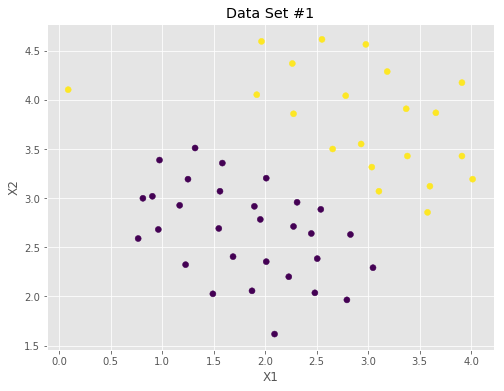

In [14]:
visualiseData(dataFile_1, 'X', 'y', "Data Set #1")

In [9]:
# visualiseData(dataFile_2, 'X', 'y', "Data Set #2")

In [10]:
# visualiseData(dataFile_3, 'X', 'y', "Data Set #3")

In [11]:
# visualiseData(dataFile_3, 'Xval', 'yval', "Validation Data Set #3")

## 1.2 Regularised Linear Regression

In [12]:
X, y, sampleSize, nVariables = getData(dataFile_1, 'X', 'y')
linearSVM = svm.SVC()
a = linearSVM.fit(X.reshape(sampleSize,-1), y)
type(a)
print(a)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [ ]:
#Function to draw the SVM boundary
def plotBoundary(my_svm, xmin, xmax, ymin, ymax):
    """
    Function to plot the decision boundary for a trained SVM
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the SVM classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    xvals = np.linspace(xmin,xmax,100)
    yvals = np.linspace(ymin,ymax,100)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            zvals[i][j] = float(my_svm.predict(np.array([xvals[i],yvals[j]])))
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    plt.title("Decision Boundary")